Énoncé du problème :

L'objectif est de construire un modèle d'apprentissage automatique qui prédit la satisfaction des passagers des compagnies aériennes à l'aide de données d'enquête et de données relatives aux vols. Cette tâche de classification vise à identifier les facteurs clés influençant la satisfaction et à fournir des informations exploitables pour améliorer la qualité du service. Une prédiction précise de la satisfaction permettra aux compagnies aériennes d'améliorer l'expérience client et les stratégies de rétention.

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [3]:
df_train = pd.read_csv('train_airline.csv')
df_test = pd.read_csv('test_airline.csv')


In [4]:
df_test.drop(['Unnamed: 0', 'id'], axis=1, inplace=True)
df_train.drop(['Unnamed: 0', 'id'], axis=1, inplace=True)

In [5]:
df_train.head(5)

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [6]:
df_test.head(5)

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,4,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,2,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,3,...,2,2,2,2,4,2,4,0,20.0,satisfied


In [7]:
df_train.shape

(103904, 23)

In [8]:
df_test.shape

(25976, 23)

In [9]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103904 non-null  object 
 1   Customer Type                      103904 non-null  object 
 2   Age                                103904 non-null  int64  
 3   Type of Travel                     103904 non-null  object 
 4   Class                              103904 non-null  object 
 5   Flight Distance                    103904 non-null  int64  
 6   Inflight wifi service              103904 non-null  int64  
 7   Departure/Arrival time convenient  103904 non-null  int64  
 8   Ease of Online booking             103904 non-null  int64  
 9   Gate location                      103904 non-null  int64  
 10  Food and drink                     103904 non-null  int64  
 11  Online boarding                    1039

In [10]:
df_train.isnull().sum()

Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64

On remarque qu'il y a 310 NaN dans Arrival delay in minutes

on va traiter ces valeurs manquantes 

In [11]:
df_train[df_train.columns[df_train.isnull().any()]].describe()

,Arrival Delay in Minutes
count,103594.000000
mean,15.178678
std,38.698682
min,0.000000
25%,0.000000
50%,0.000000
75%,13.000000
max,1584.000000


* D'aprés describe on constate qu'il ya un enorme écart entre la moyenne et la mediane ce qui veux dire
que la distribution est asymétrique 




* ET la valeur max est aussi supérieur a 75% donc les outliers sont haut 


Text(0.5, 1.0, 'Distribution ')

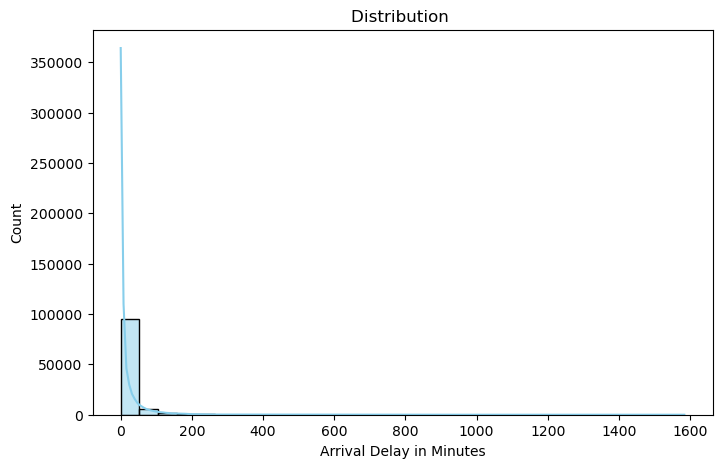

In [12]:
plt.figure(figsize=(8,5))
sns.histplot(df_train['Arrival Delay in Minutes'], kde=True, bins=30, color='skyblue')
plt.title('Distribution ')

* Ici on a une distribution asymetrique à droite 

In [13]:
count = (103904 - 310)
count / len(df_train)

0.9970164767477672

* Les valeurs manquantes ne présente pas un grand nombre donc on va les supprimer 

In [14]:
df_train = df_train.dropna()

In [15]:
df_train.isnull().sum()

Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

In [16]:
df_train.shape

(103594, 23)

* Distribustion da la viariable cible

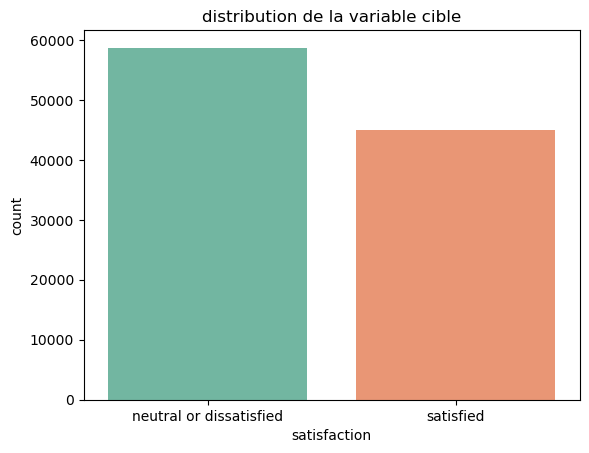

In [17]:
df_train['satisfaction'].value_counts(normalize=True)
sns.countplot(x='satisfaction', data=df_train, palette='Set2')
plt.title('distribution de la variable cible')
plt.show()

* corrélation de la variables cible avec les variables catégorielle 
* On va utilisé le test Chi²

In [18]:
from scipy.stats import chi2_contingency

variables_categorielles = df_train.select_dtypes(include='object').columns.tolist()
variables_categorielles.remove('satisfaction')  # on ne compare pas la cible à elle-même


results = []

for var in variables_categorielles:
    table = pd.crosstab(df_train[var], df_train['satisfaction'])
    chi2, p, dof, expected = chi2_contingency(table)
    results.append({'Variable': var, 'Chi2': chi2, 'p-value': p})

    
chi2_df = pd.DataFrame(results).sort_values(by='p-value')
print(chi2_df)

         Variable          Chi2   p-value
1   Customer Type   3643.266655  0.000000
2  Type of Travel  20882.221285  0.000000
3           Class  26402.222024  0.000000
0          Gender     15.765918  0.000072


* D'aprés le test Chi² on remarque que P-value de toutes les variables catégorielles est < a 0.05 cela signifie qu'il y a une relation entre la variable cible et les variables catégorielles 

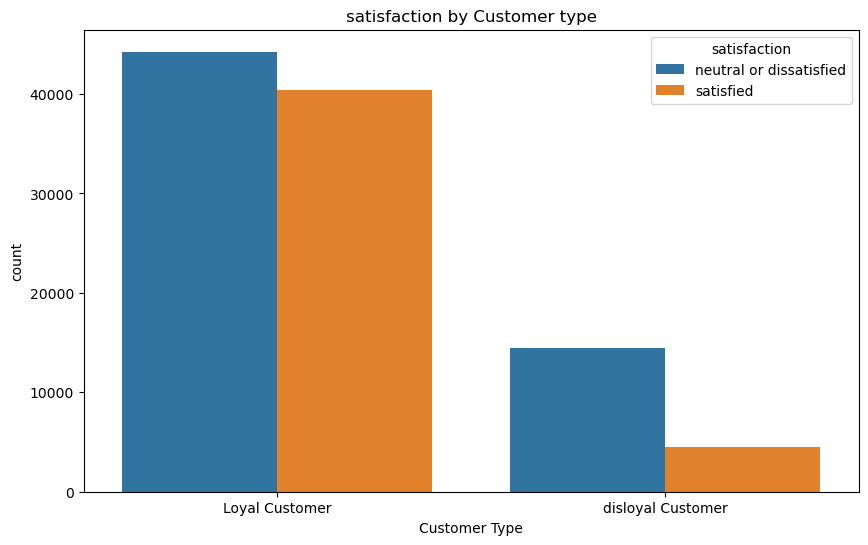

In [19]:
plt.figure(figsize=(10,6))
sns.countplot(data=df_train, x='Customer Type', hue='satisfaction')
plt.title('satisfaction by Customer type')
plt.show()

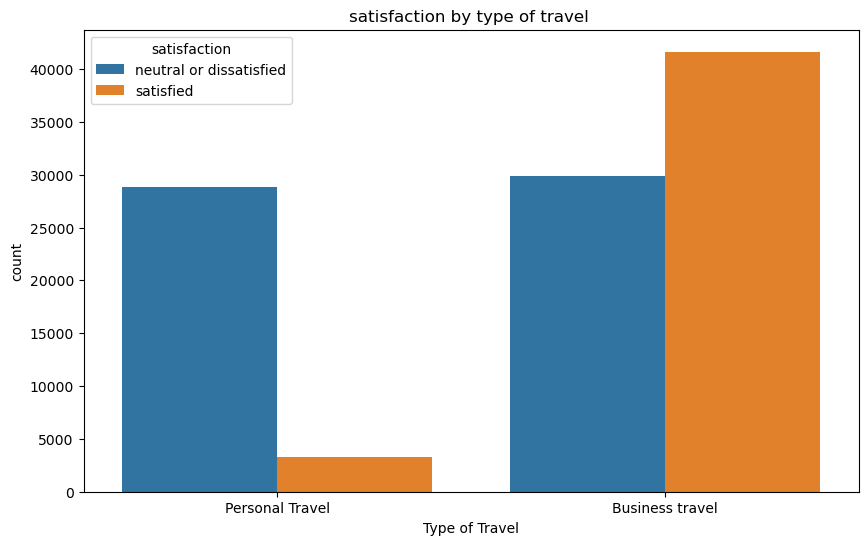

In [20]:
plt.figure(figsize=(10,6))
sns.countplot(data=df_train, x='Type of Travel', hue='satisfaction')
plt.title('satisfaction by type of travel ')
plt.show()

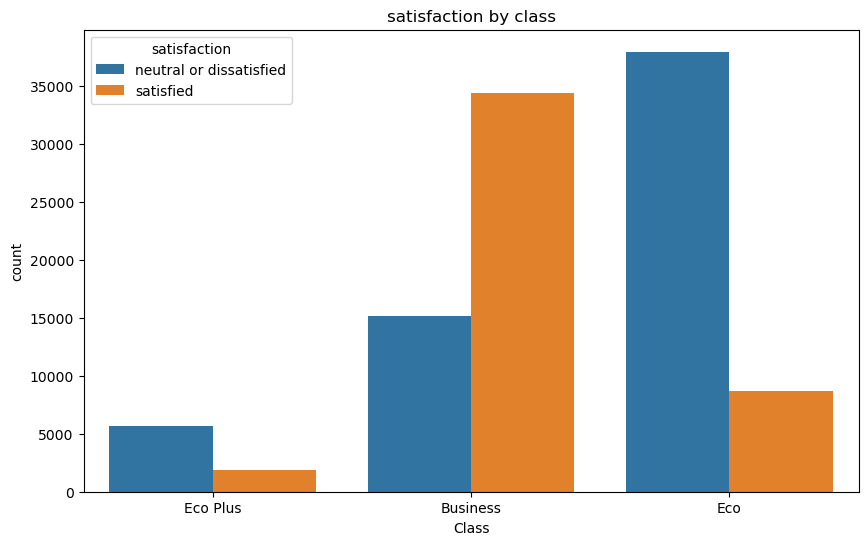

In [21]:
plt.figure(figsize=(10,6))
sns.countplot(data=df_train, x='Class', hue='satisfaction')
plt.title('satisfaction by class')
plt.show()

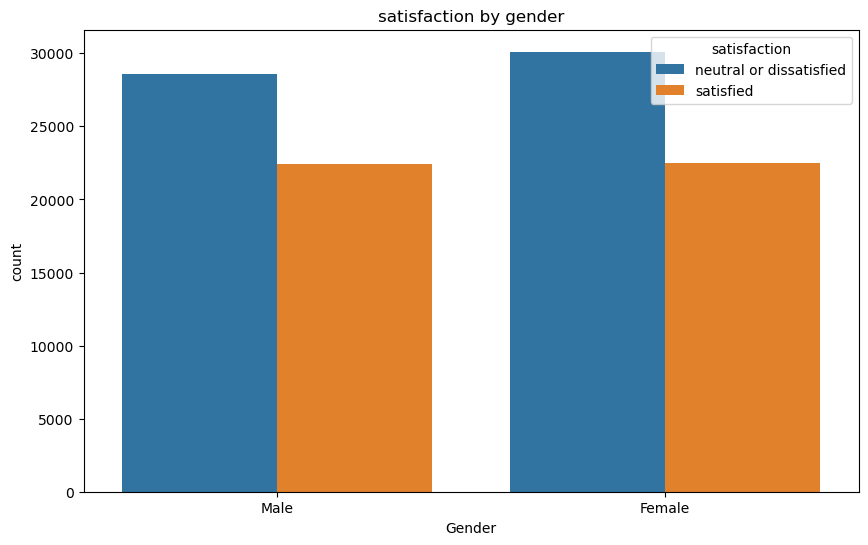

In [22]:
plt.figure(figsize=(10,6))
sns.countplot(data=df_train, x='Gender', hue='satisfaction')
plt.title('satisfaction by gender')
plt.show()

* Matrice de corrélation
* avant on va supprimer les variable inutile

In [24]:
df_train.shape

(103594, 23)

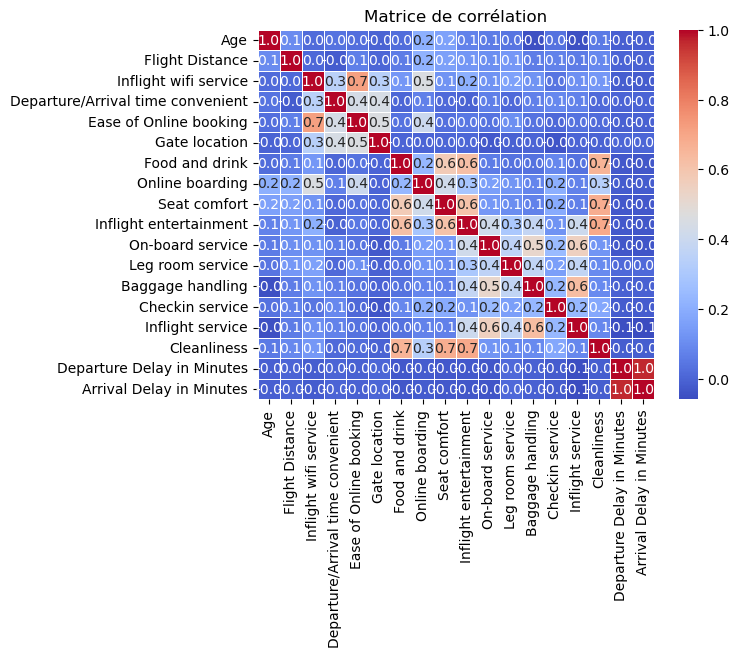

In [25]:
# Matrice de corrélation 

corr= df_train.corr(numeric_only=True)
sns.heatmap(corr, annot=True, fmt=".1f", cmap='coolwarm', linewidths=0.5)
plt.title('Matrice de corrélation')
plt.show()

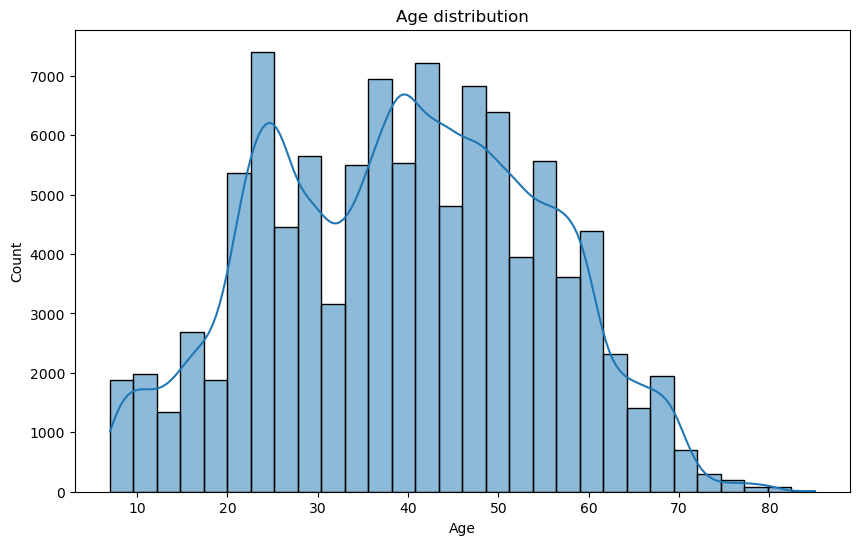

In [26]:
plt.figure(figsize=(10,6))
sns.histplot(df_train ['Age'], kde=True, bins=30)
plt.title('Age distribution')
plt.show()

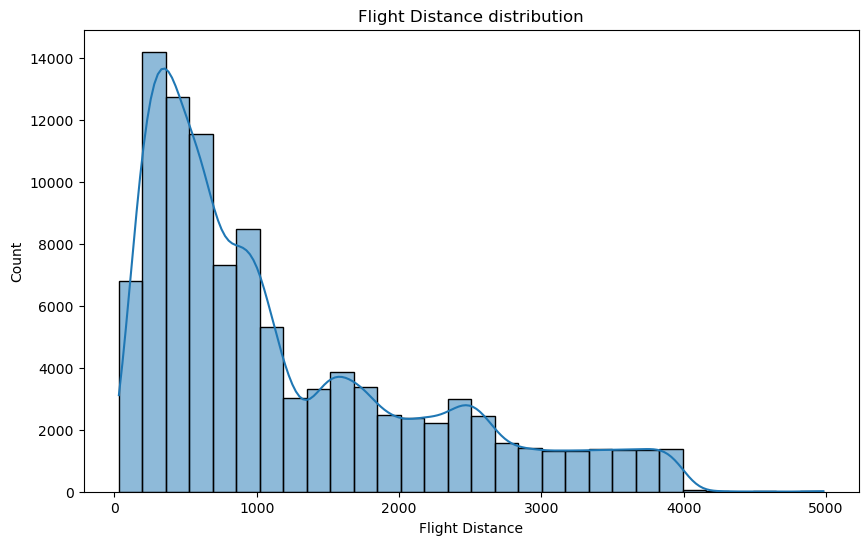

In [27]:
plt.figure(figsize=(10,6))
sns.histplot(df_train['Flight Distance'], kde=True, bins=30)
plt.title('Flight Distance distribution')
plt.show()

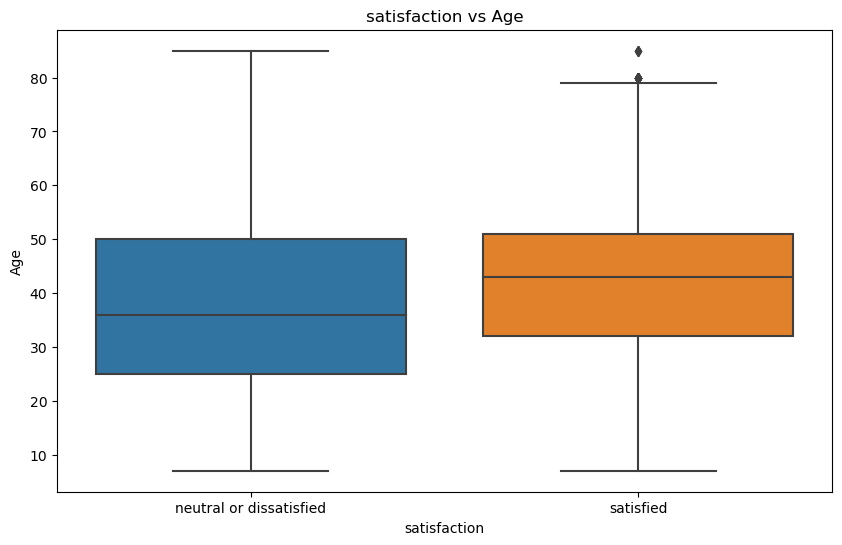

In [28]:
plt.figure(figsize=(10,6))
sns.boxplot( x='satisfaction', y='Age',data=df_train)
plt.title('satisfaction vs Age')
plt.show()

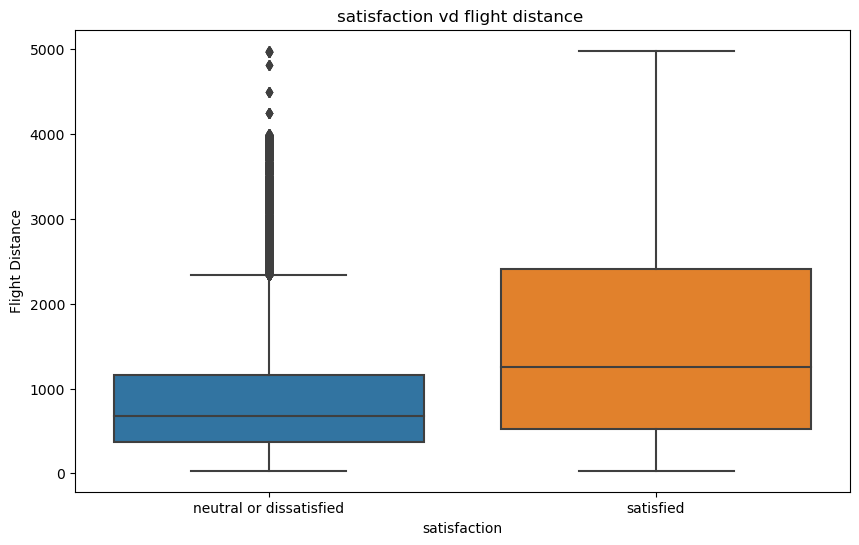

In [29]:
plt.figure(figsize=(10,6))
sns.boxplot(x='satisfaction', y='Flight Distance', data=df_train)
plt.title('satisfaction vd flight distance ')
plt.show()

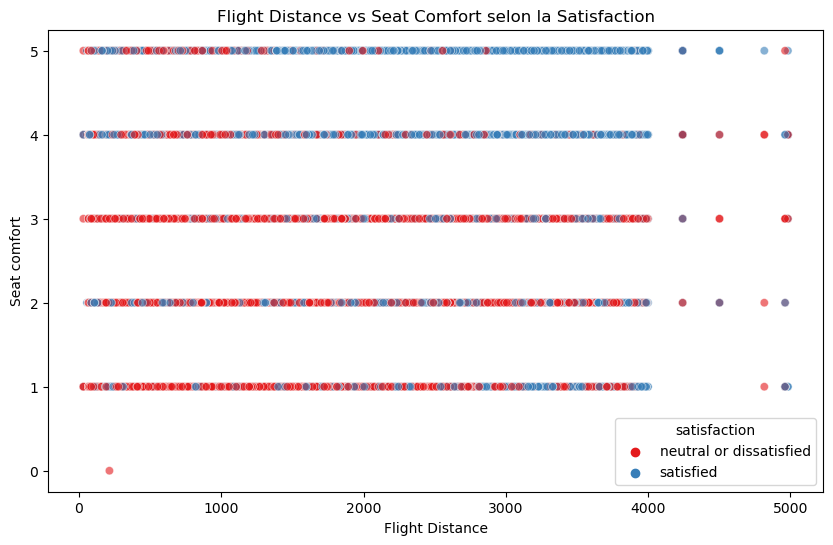

In [30]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df_train, x='Flight Distance', y='Seat comfort', hue='satisfaction', palette='Set1', alpha=0.6 )
plt.title('Flight Distance vs Seat Comfort selon la Satisfaction')
plt.show()

#  df_test

In [32]:
df_test.isnull().sum()

Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             83
satisfaction                          0
dtype: int64

In [33]:
df_test = df_test.dropna()

In [34]:
df_test.isnull().sum()

Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

* Encodage et normalisation 

In [35]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline

# 1. Séparer X et y
X_train = df_train.drop('satisfaction', axis=1)
y_train = df_train['satisfaction']

X_test = df_test.drop('satisfaction', axis=1)
y_test = df_test['satisfaction']


colonne_categorielle = X_train.select_dtypes(include='object').columns.tolist()
colonne_numerique = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()


preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), colonne_numerique),
        ('cat', OneHotEncoder(handle_unknown='ignore', drop='first'), colonne_categorielle)
    ]
)





In [39]:
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)


# random forest

In [43]:
from sklearn.ensemble import RandomForestClassifier

model=RandomForestClassifier()
model.fit(X_train_preprocessed,y_train)

RandomForestClassifier()

In [44]:
y_pred= model.predict(X_test_preprocessed)

In [45]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Accuracy :", accuracy_score(y_test, y_pred))
print("\nClassification Report :\n", classification_report(y_test, y_pred))
print("Matrice de confusion :\n", confusion_matrix(y_test, y_pred))

Accuracy : 0.9619202100953925

Classification Report :
                          precision    recall  f1-score   support

neutral or dissatisfied       0.96      0.98      0.97     14528
              satisfied       0.97      0.94      0.96     11365

               accuracy                           0.96     25893
              macro avg       0.96      0.96      0.96     25893
           weighted avg       0.96      0.96      0.96     25893

Matrice de confusion :
 [[14209   319]
 [  667 10698]]


# KNN

In [46]:
from sklearn.neighbors import KNeighborsClassifier

model_knn = model = KNeighborsClassifier(n_neighbors=5) 

In [47]:
model_knn.fit(X_train_preprocessed, y_train)

KNeighborsClassifier()

In [48]:
y_pred_knn=model_knn.predict(X_test_preprocessed)

In [49]:
print("Accuracy :", accuracy_score(y_test, y_pred))
print("\nClassification Report :\n", classification_report(y_test, y_pred))
print("Matrice de confusion :\n", confusion_matrix(y_test, y_pred))

Accuracy : 0.9619202100953925

Classification Report :
                          precision    recall  f1-score   support

neutral or dissatisfied       0.96      0.98      0.97     14528
              satisfied       0.97      0.94      0.96     11365

               accuracy                           0.96     25893
              macro avg       0.96      0.96      0.96     25893
           weighted avg       0.96      0.96      0.96     25893

Matrice de confusion :
 [[14209   319]
 [  667 10698]]


# decision tree

In [50]:
from sklearn.tree import DecisionTreeClassifier


model_DT = DecisionTreeClassifier(random_state=42)

In [51]:
model_DT.fit(X_train_preprocessed, y_train)a

DecisionTreeClassifier(random_state=42)

In [52]:
y_pred_DT= model_DT.predict(X_test_preprocessed)

In [53]:
print("Accuracy :", accuracy_score(y_test, y_pred))
print("\nClassification Report :\n", classification_report(y_test, y_pred))
print("Matrice de confusion :\n", confusion_matrix(y_test, y_pred))

Accuracy : 0.9619202100953925

Classification Report :
                          precision    recall  f1-score   support

neutral or dissatisfied       0.96      0.98      0.97     14528
              satisfied       0.97      0.94      0.96     11365

               accuracy                           0.96     25893
              macro avg       0.96      0.96      0.96     25893
           weighted avg       0.96      0.96      0.96     25893

Matrice de confusion :
 [[14209   319]
 [  667 10698]]


* on a obtenu les mêmes résultats dans les 3 modeles utiliser 

* visualisation des varibles importante 

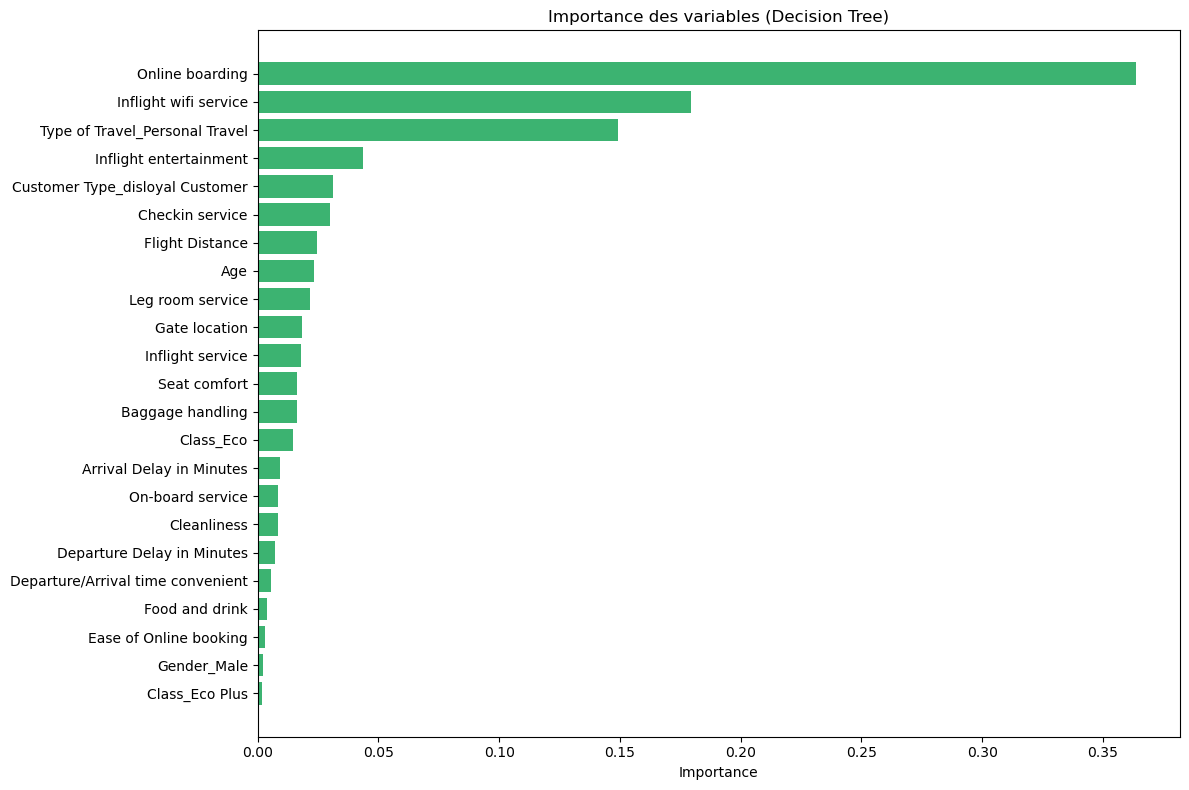

In [65]:
# Obtenir les noms des variables après transformation
cat_encoder = preprocessor.named_transformers_['cat']
cat_features = cat_encoder.get_feature_names_out(colonne_categorielle)
feature_names = np.concatenate([colonne_numerique, cat_features])


importances = model_DT.feature_importances_
indices = np.argsort(importances)[::-1]


plt.figure(figsize=(12, 8))
plt.title("Importance des variables (Decision Tree)")
plt.barh(range(len(indices)), importances[indices], align="center", color='mediumseagreen')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.gca().invert_yaxis()
plt.xlabel("Importance")
plt.tight_layout()
plt.show()


### Interprétation du graphe d’importance des variables (Decision Tree)

Le graphique présente l’importance des variables utilisée par le modèle **Decision Tree** pour prédire la satisfaction des passagers.

####  Variables les plus influentes :

- **Online boarding (~37%)** :  
  C’est le facteur **le plus déterminant**. Un processus d’embarquement en ligne fluide semble fortement lié à la satisfaction client.

- **Inflight wifi service (~18%)** :  
  La qualité du wifi à bord est un élément essentiel, surtout pour les passagers souhaitant rester connectés.

- **Type of Travel = Personal Travel (~15%)** :  
  Le type de voyageur joue un rôle important. Les passagers en déplacement personnel sont généralement plus attentifs à l'expérience globale.

- **Inflight entertainment** :  
  Le divertissement contribue au confort perçu, en particulier sur les vols long-courriers.

#### Variables les moins importantes :

Des variables comme **Class_Eco Plus**, **Gender_Male**, **Ease of Online booking**, ou encore **Food and drink** ont une importance relativement faible dans le modèle. Cela signifie qu'elles n’apportent pas une forte valeur discriminante dans la prédiction de la satisfaction.

#### Conclusion :

Le modèle montre que la **qualité des services numériques et à bord** (embarquement, wifi, divertissement) est plus déterminante pour la satisfaction des passagers que d'autres éléments plus classiques comme la nourriture ou le sexe du passager.